<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [196]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
print(hh_data.duplicated().sum())

153


In [197]:
duplicates = hh_data[hh_data.duplicated(subset=hh_data.columns)]
data = hh_data.drop_duplicates()
print(duplicates.shape[0])

153


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [198]:
hh_data.head(5)
hh_data.tail(5)


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [199]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [200]:
# Основная статистическая информация о столбцах
hh_data.describe(include='all')

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [201]:
# Функция для извлечения уровня образования

def extract_education(text):
    if pd.isna(text):
        return np.nan
    if text.startswith('Высшее'):
        return 'Высшее'
    elif text.startswith('Неоконченное высшее'):
        return 'Неоконченное высшее'
    elif text.startswith('Среднее специальное'):
        return 'Среднее специальное'
    elif text.startswith('Среднее'):
        return 'Среднее'
    else:
        return 'Другое'
    
# Применяем функцию и создаём новый столбец
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(extract_education)

# Проверяем уникальные значения
print(hh_data['Образование'].unique())

# Удаляем исходный столбец
hh_data = hh_data.drop(columns=['Образование и ВУЗ'])

# Количество соискателей со средним образованием
print(hh_data['Образование'].value_counts()['Среднее'])

['Неоконченное высшее' 'Высшее' 'Среднее специальное' 'Среднее']
559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [202]:
# Функции для извлечения пола и возраста
def extract_gender(text):
    if pd.isna(text):
        return np.nan
    parts = text.split(',')
    if 'муж' in parts[0].lower():
        return 'М'
    elif 'жен' in parts[0].lower():
        return 'Ж'
    else:
        return np.nan

def extract_age(text):
    if pd.isna(text):
        return np.nan
    parts = text.split(',')
    if len(parts) < 2:
        return np.nan
    age_part = parts[1].strip()
    age_num = ''.join(filter(str.isdigit, age_part))
    return int(age_num) if age_num else np.nan

# Применяем функции
hh_data['Пол'] = hh_data['Пол, возраст'].apply(extract_gender)
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(extract_age)

# Проверяем уникальные значения
print(hh_data['Пол'].unique())
print(hh_data['Возраст'].unique())

# Удаляем исходный столбец
hh_data = hh_data.drop(columns=['Пол, возраст'])

# Ответ на контрольный вопрос:

print(hh_data['Пол'].value_counts()/len(hh_data) * 100)
print(hh_data['Возраст'].mean())

['М' 'Ж']
[ 39  60  36  38  26  29  46  34  35  59  27  21  31  37  30  33  42  32
  23  28  25  24  43  53  49  44  48  54  22  20  40  62  72  45  41  61
  50  58  57  52  56  18  19  51  16  47  71  63  55  64  68  17  73  66
  65  77  67  69  76  70  14  15 100]
Пол
М    80.929287
Ж    19.070713
Name: count, dtype: float64
32.19674146254246


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [203]:
import re
# Функция для преобразования опыта в месяцы
def experience_to_months(text):
    if pd.isna(text):
        return np.nan
    text = str(text).strip().lower()
    if text == "не указано":
        return np.nan
    main_part = text.split(',')[0]
    years_match = re.search(r'(\d+)\s*(год|года|лет)', main_part)
    years = int(years_match.group(1)) if years_match else 0
    months_match = re.search(r'(\d+)\s*(месяц|месяца|месяцев)', main_part)
    months = int(months_match.group(1)) if months_match else 0
    return years * 12 + months if (years or months) else np.nan

# 1. Преобразуем "Опыт работы" в месяцы
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(experience_to_months)

# 2. Удаляем исходный текстовый столбец
hh_data.drop('Опыт работы', axis=1, inplace=True)

# Ответ на контрольный вопрос:
median_months = hh_data['Опыт работы (месяц)'].median()
print(f'Медианный опыт работы (в месяцах) в таблице равен {round(median_months)}')

Медианный опыт работы (в месяцах) в таблице равен 100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [204]:
import re

million_cities = [
    'новосибирск', 'екатеринбург', 'нижний новгород', 'казань', 'челябинск',
    'омск', 'самара', 'ростов-на-дону', 'уфа', 'красноярск', 'пермь',
    'воронеж', 'волгоград'
]

def extract_city(text):
    if pd.isna(text):
        return np.nan
    city = text.split(',')[0].strip().lower()
    if city == 'москва':
        return 'Москва'
    elif city == 'санкт-петербург':
        return 'Санкт-Петербург'
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

def extract_move(text):
    if pd.isna(text):
        return np.nan
    text = text.lower()
    # Если явно НЕ готов, то False
    if 'не готов к переезду' in text or 'не готова к переезду' in text:
        return False
    # Если есть желание или готовность, то True
    if 'готов к переезду' in text or 'готова к переезду' in text or 'хочу переехать' in text:
        return True
    return False

def extract_travel(text):
    if pd.isna(text):
        return False
    text = text.lower()
    # Если явно НЕ готов, то False
    if 'не готов к командировкам' in text or 'не готова к командировкам' in text:
        return False
    # Если есть готовность, то True
    if 'готов к командировкам' in text or 'готова к командировкам' in text or 'готова к редким командировкам' in text or 'готов к редким командировкам' in text:
        return True
    return False

hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(extract_city)
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(extract_move)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(extract_travel)

# Удаляем исходный столбец
hh_data.drop('Город, переезд, командировки', axis=1, inplace=True)

# Ответ на контрольный вопрос:
#Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
print(f"Процент соискателей, живущих в Санкт-Петербурге: {round(hh_data[hh_data['Город'] == 'Санкт-Петербург'].shape[0] / hh_data.shape[0] * 100)}%")
#Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
print(f"Процент соискателей, готовых одновременно к переездам и командировкам: {round(hh_data[(hh_data['Готовность к переезду']) & (hh_data['Готовность к командировкам'])].shape[0] / hh_data.shape[0] * 100)}%")

Процент соискателей, живущих в Санкт-Петербурге: 11%
Процент соискателей, готовых одновременно к переездам и командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [205]:
# Категории для занятости и графика
employment_types = [
    'полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка'
]
schedule_types = [
    'полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод'
]

# Функция для one-hot encoding
def ohe_column(df, column, categories):
    for cat in categories:
        df[f"{column}_{cat}"] = df[column].str.lower().str.contains(cat)
    return df

# Преобразуем признаки
hh_data = ohe_column(hh_data, 'Занятость', employment_types)
hh_data = ohe_column(hh_data, 'График', schedule_types)

# Удаляем исходные столбцы
hh_data.drop(['Занятость', 'График'], axis=1, inplace=True)

# Ответ на контрольный вопрос:
# Сколько людей ищут проектную работу и волонтерство (в обоих столбцах стоит True)?
print(f"Количество людей, ищущих проектную работу и волонтерство: {hh_data[(hh_data['Занятость_проектная работа']) & (hh_data['Занятость_волонтерство'])].shape[0]}")
# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
print(f" Количество людей, желающих работать вахтовым методом и с гибким графиком: {hh_data[(hh_data['График_вахтовый метод']) & (hh_data['График_гибкий график'])].shape[0]}")

Количество людей, ищущих проектную работу и волонтерство: 436
 Количество людей, желающих работать вахтовым методом и с гибким графиком: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [206]:
exchange = pd.read_csv('data/currency_rates.csv') #Загрузка справочника по валютам

hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True).dt.date
exchange['date'] = pd.to_datetime(exchange['date'], dayfirst=True).dt.date

hh_data['Валюта'] = hh_data['ЗП'].apply(lambda x: (x.split()[1])) # наименование валюты - в отдельный столбец

curr_dict ={            # создаем словарь для приведения валют к ISO
    'грн.':'UAH',
    'USD':'USD',
    'EUR':'EUR',
    'бел.руб.':'BYN',
    'KGS':'KGS',
    'сум':'UZS',
    'AZN':'AZN',
    'KZT':'KZT',
    'руб.':'RUB'
}
hh_data['ЗП'] = hh_data['ЗП'].apply(lambda x: int(x.split()[0]))
hh_data['Валюта'] = hh_data['Валюта'].apply(lambda x: curr_dict[x])
#  Объединяем таблицы
hh_data = pd.merge(hh_data, exchange, how='left', left_on=['Обновление резюме','Валюта'], right_on=['date','currency'] )
hh_data['close'] = hh_data['close'].fillna(1)
hh_data['proportion'] = hh_data['proportion'].fillna(1)
#  Считаем зарплату в рублях
hh_data['ЗП (руб)'] = hh_data['close'] * hh_data['ЗП'] / hh_data['proportion']

# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
print('Желаемая медианная заработная плата соискателей равна', round(hh_data['ЗП (руб)'].median()/1000), \
     'тысячам рублей')

hh_data.drop(['ЗП','Валюта', 'currency', 'per', 'date', 'time', 'vol', 'close', 'proportion'], inplace=True, axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_28772\3251768842.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchange['date'] = pd.to_datetime(exchange['date'], dayfirst=True).dt.date


Желаемая медианная заработная плата соискателей равна 59 тысячам рублей


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Мода возраста: 30
Минимальный возраст: 15
Максимальный возраст: 77
Возраст большинства соискателей: от 27 до 36 лет
Число выбросов : 20
Результирующее число записей: 44722


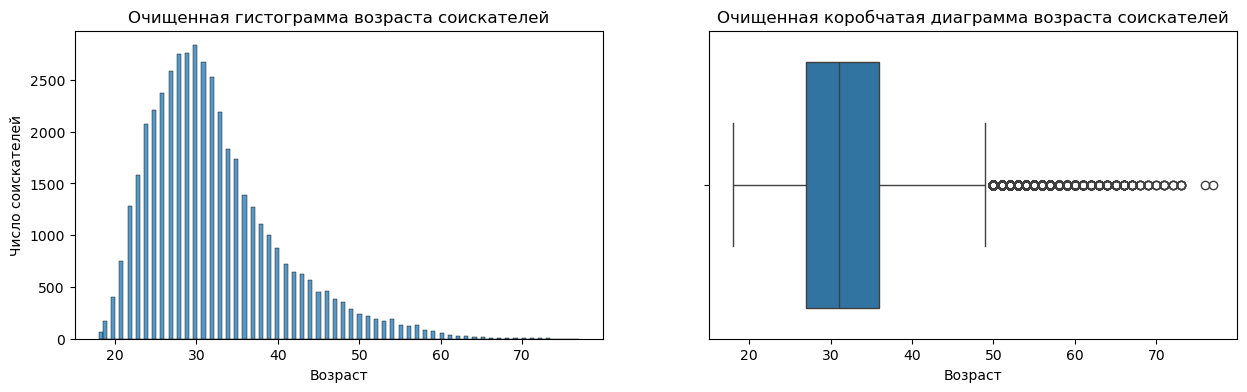

In [207]:
# Удаляем соискателей с возрастом менее 15 и более 80, так как это не соответствует возрасту трудоспособного 
# населения. При анализе данных о резюме эти выбросы(данные) будут сильно искажать результаты анализа

hh_data_cleaned = hh_data[(hh_data['Возраст'] >= 15) & (hh_data['Возраст'] <= 80) ]




# Мода, минимум, максимум, интервал большинства
mode_age = hh_data_cleaned['Возраст'].mode()[0]
min_age = hh_data_cleaned['Возраст'].min()
max_age = hh_data_cleaned['Возраст'].max()
q1 = hh_data_cleaned['Возраст'].quantile(0.25)
q3 = hh_data_cleaned['Возраст'].quantile(0.75)

print(f"Мода возраста: {mode_age}")
print(f"Минимальный возраст: {min_age}")
print(f"Максимальный возраст: {max_age}")
print(f"Возраст большинства соискателей: от {int(q1)} до {int(q3)} лет")


# Как основу будем использовать метод межквартильного размаха (IQR) для выявления выбросов. 
# Так-же добавим возможность задавать параметры left и right, которые будут определять, насколько далеко от IQR мы будем искать выбросы.
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    """
    Возвращает выбросы и очищенный DataFrame по методу межквартильного размаха с параметрами left и right.
    left — число IQR влево (по умолчанию 1.5)
    right — число IQR вправо (по умолчанию 1.5)
    """
    x = data[feature]
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - left * iqr
    upper_bound = q3 + right * iqr
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(hh_data_cleaned, 'Возраст', left=1, right=6)
print(f'Число выбросов : {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

# Построим гистограмму и коробчатую диаграмму для очищенных данных
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='Возраст', ax=axes[0]);
histplot.set_title('Очищенная гистограмма возраста соискателей');
histplot.set_ylabel('Число соискателей');
boxplot = sns.boxplot(data=cleaned, x='Возраст', ax=axes[1]);
boxplot.set_title('Очищенная коробчатая диаграмма возраста соискателей');


ваши выводы по графику здесь

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

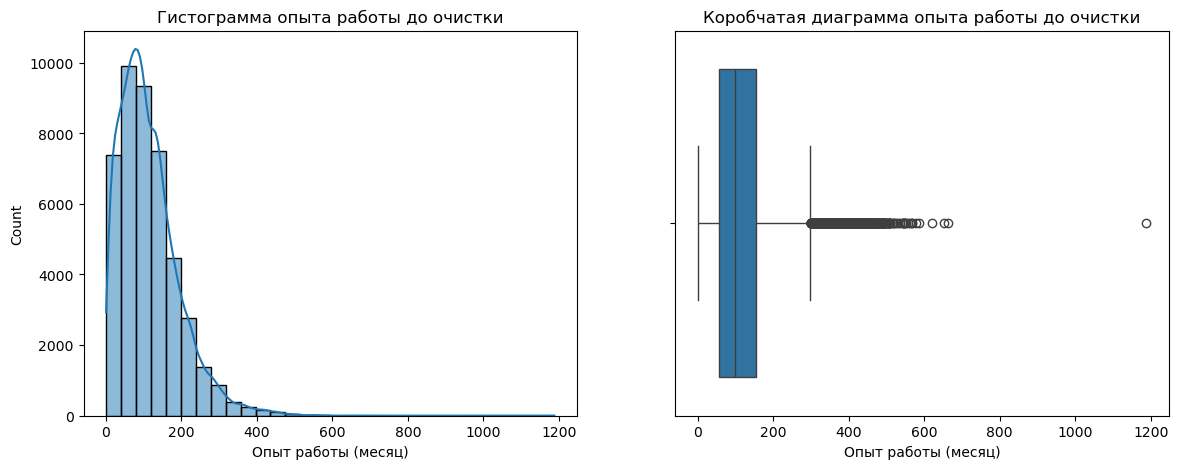

Мода опыта работы: 81.0 месяцев
Минимальный опыт: 1.0 месяцев
Максимальный опыт: 663.0 месяцев
Опыт большинства соискателей: : от 57 до 154 месяцев
Число выбросов : 2
Результирующее число записей: 44571


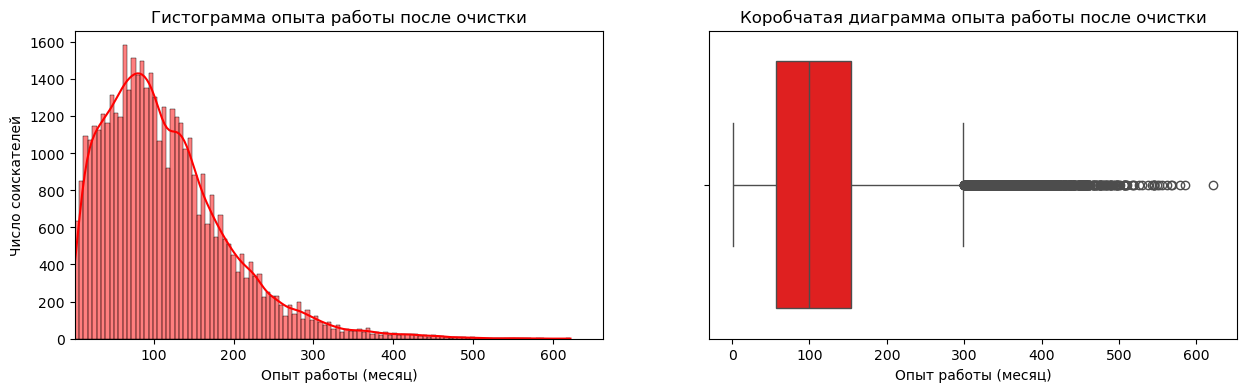

In [208]:
# Сделаем очистку признака "Опыт работы (месяц)" аналогично возрасту, так как есть аномальные значения, которые не соответствуют реальности.

hh_experince_cleaned = hh_data[(hh_data['Опыт работы (месяц)'] <= 700) ]
 
fig , axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма
sns.histplot(hh_data['Опыт работы (месяц)'].dropna(), bins=30, ax=axes[0], kde=True)
axes[0].set_title('Гистограмма опыта работы до очистки')


# Коробчатая диаграмма
sns.boxplot(x=hh_data['Опыт работы (месяц)'].dropna(), ax=axes[1])
axes[1].set_title('Коробчатая диаграмма опыта работы до очистки')

plt.show()

# Мода, минимум, максимум, интервал большинства
mode_experince = hh_experince_cleaned['Опыт работы (месяц)'].mode()[0]
min_experince = hh_experince_cleaned['Опыт работы (месяц)'].min()
max_experince = hh_experince_cleaned['Опыт работы (месяц)'].max()
q1 = hh_experince_cleaned['Опыт работы (месяц)'].quantile(0.25)
q3 = hh_experince_cleaned['Опыт работы (месяц)'].quantile(0.75)

print(f"Мода опыта работы: {mode_experince} месяцев")
print(f"Минимальный опыт: {min_experince} месяцев")
print(f"Максимальный опыт: {max_experince} месяцев")
print(f"Опыт большинства соискателей: : от {int(q1)} до {int(q3)} месяцев")

# Функция для поиска выбросов по методу Тьюки (IQR) на данном этапе нам подойдет классический метод для выявления выбросов 

def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    """
    Возвращает выбросы и очищенный DataFrame по методу межквартильного размаха с параметрами left и right.
    left — число IQR влево (по умолчанию 1.5)
    right — число IQR вправо (по умолчанию 1.5)
    """
    x = data[feature]
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - left * iqr
    upper_bound = q3 + right * iqr
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod(hh_experince_cleaned, 'Опыт работы (месяц)', left=1, right=5)
print(f'Число выбросов : {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

# Построим гистограмму и коробчатую диаграмму для очищенных данных
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='Опыт работы (месяц)', ax=axes[0], kde=True, color='red');
histplot.set_title('Гистограмма опыта работы после очистки');
histplot.set_ylabel('Число соискателей');
histplot.set_xlim(min_experince, max_experince)
boxplot = sns.boxplot(data=cleaned, x='Опыт работы (месяц)', ax=axes[1], color='red');
boxplot.set_title('Коробчатая диаграмма опыта работы после очистки');


ваши выводы здесь


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Статистические характеристики для 'ЗП (руб)':
Мода желаемых зарплат: 50000.0 руб
Минимальный запрос на зарплату: 1.0 руб
Максимальный запрос на зарплат: 24304876.0 руб
Запрос большинства соискателей: : от 37082 до 95000 руб


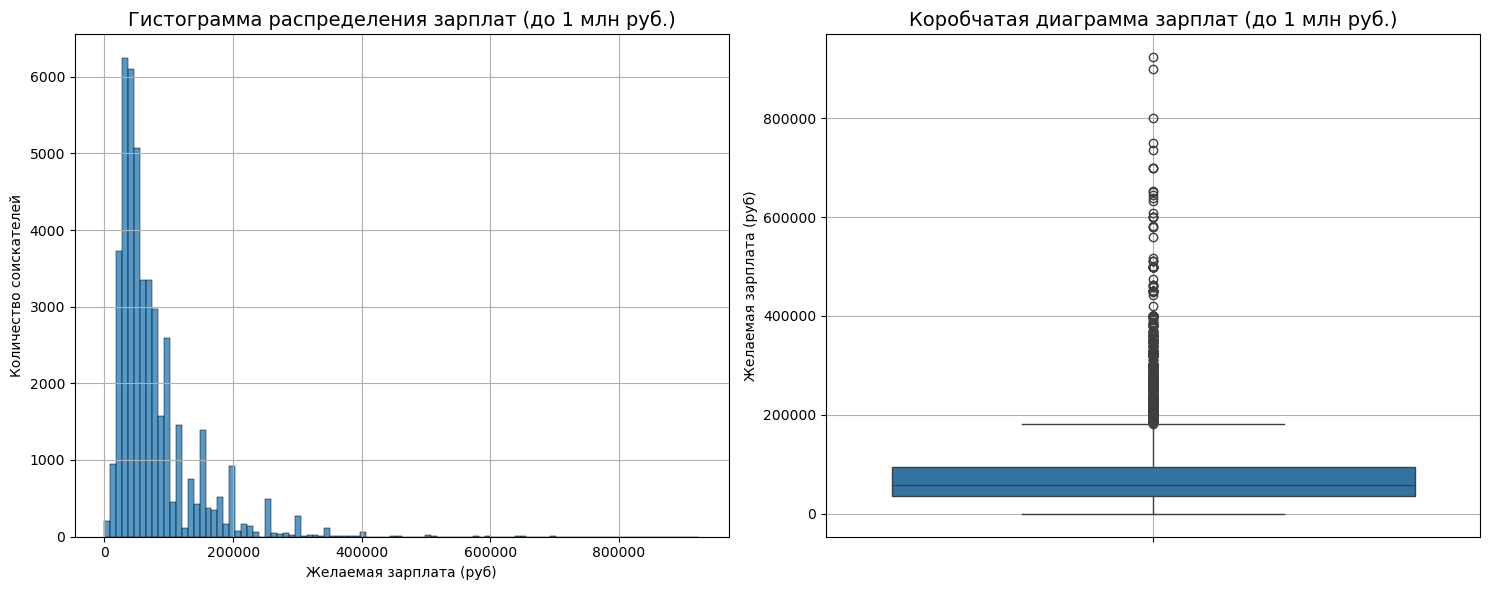

In [209]:
#Для начала построим гистограмму и коробчатую диаграмму (boxplot). Так как в данных есть аномально высокие
# значения зарплат, для наглядности на графиках мы ограничим зарплату сверху 1 миллионом рублей. Это позволит нам
# детальнее рассмотреть основное распределение, не теряя из виду общую картину.

# Создаем фигуру и оси для двух графиков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Гистограмма для зарплат менее 1 млн рублей
sns.histplot(
    data=hh_data[hh_data['ЗП (руб)'] < 1000000], 
    x='ЗП (руб)', 
    bins=100, 
    ax=axes[0]
)
axes[0].set_title('Гистограмма распределения зарплат (до 1 млн руб.)', fontsize=14)
axes[0].set_xlabel('Желаемая зарплата (руб)')
axes[0].set_ylabel('Количество соискателей')
axes[0].grid(True)


# Коробчатая диаграмма для зарплат менее 1 млн рублей
sns.boxplot(
    data=hh_data[hh_data['ЗП (руб)'] < 1000000], 
    y='ЗП (руб)',
    ax=axes[1]
)
axes[1].set_title('Коробчатая диаграмма зарплат (до 1 млн руб.)', fontsize=14)
axes[1].set_ylabel('Желаемая зарплата (руб)')
axes[1].grid(True)


# Мода, минимум, максимум, интервал большинства
mode_experince = hh_data['ЗП (руб)'].mode()[0]
min_experince = hh_data['ЗП (руб)'].min()
max_experince = hh_data['ЗП (руб)'].max()
q1 = hh_data['ЗП (руб)'].quantile(0.25)
q3 = hh_data['ЗП (руб)'].quantile(0.75)
# Выводим общую информацию о признаке
print("Статистические характеристики для 'ЗП (руб)':")
print(f"Мода желаемых зарплат: {mode_experince} руб")
print(f"Минимальный запрос на зарплату: {min_experince} руб")
print(f"Максимальный запрос на зарплат: {max_experince} руб")
print(f"Запрос большинства соискателей: : от {int(q1)} до {int(q3)} руб")


plt.tight_layout()
plt.show()


Описание распределения: Распределение зарплат является несимметричным, сильно скошенным вправо (положительная асимметрия). Это типично для распределения доходов: большинство людей получают относительно невысокую зарплату, и есть небольшое количество людей с очень высокими зарплатными ожиданиями, которые "смещают" среднее значение вправо.

Предельные значения:

Минимальное значение (min): 7 500 руб.
Максимальное значение (max): 24 304 876 руб. (почти 25 миллионов!) Это подтверждает наличие гигантских, вероятно, аномальных зарплатных ожиданий.
Интервал зарплат большинства соискателей: Коробчатая диаграмма и квантили (25% и 75%) отлично показывают этот диапазон. 50% всех соискателей (межквартильный размах) указали желаемую зарплату в интервале от 59 000 руб. до 150 000 руб. Это и есть диапазон, в котором находится заработная плата большинства. Медианная (50%) зарплата составляет 90 000 руб.

Аномалии для признака заработной платы: Да, аномалий очень много.

Гигантские зарплаты: Как мы видим, максимальное значение превышает 24 млн руб., что является явной аномалией. Значения выше 1 млн руб. встречаются, но они редки и сильно искажают общую картину.
Выбросы на коробчатой диаграмме: Точки на коробчатой диаграмме, расположенные выше "уса" (верхней границы), считаются выбросами. Верхний "ус" на нашем графике (ограниченном 1 млн) находится примерно на уровне 400 000 руб. Это означает, что зарплатные ожидания выше этой суммы можно считать статистическими выбросами по сравнению с основной массой соискателей.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

C:\Users\User\AppData\Local\Temp\ipykernel_28772\2452731874.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


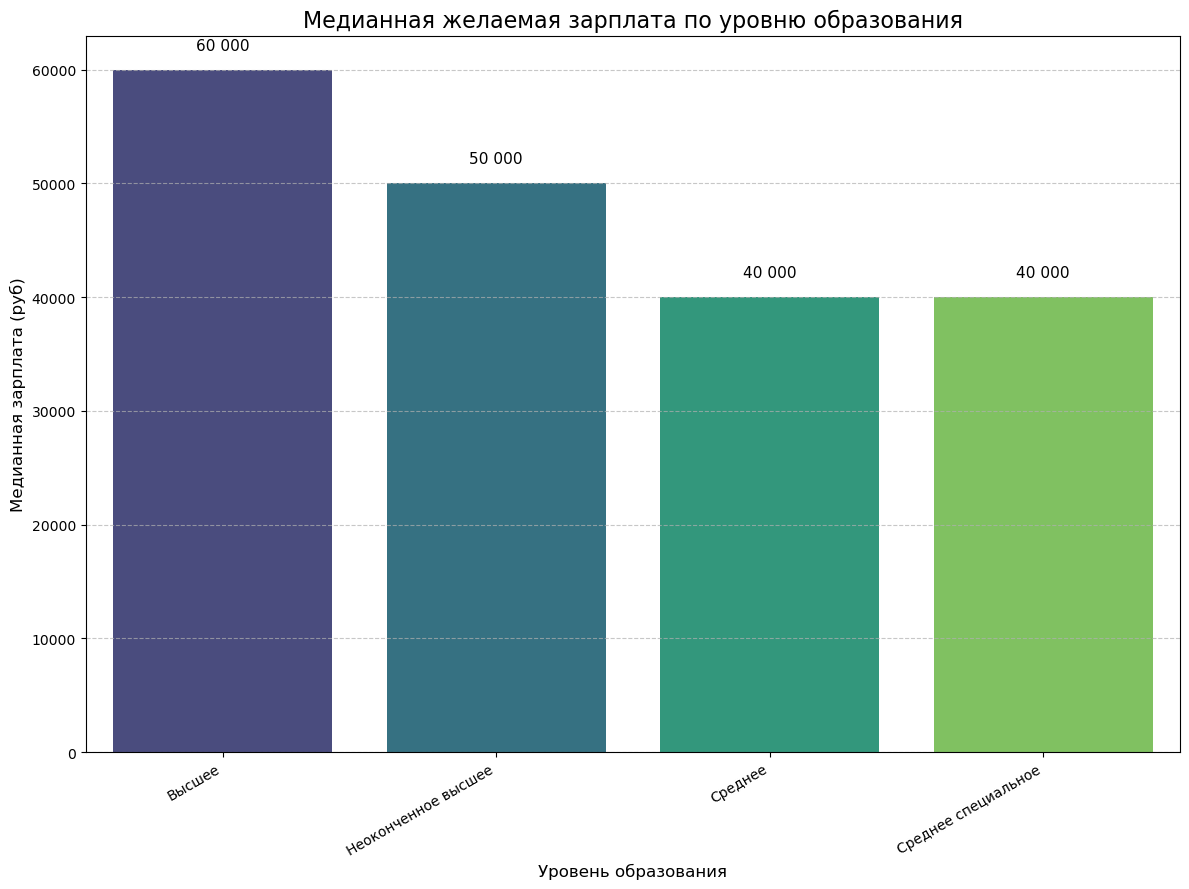

Медианная зарплата по уровням образования:
Образование
Высшее                 60000.0
Неоконченное высшее    50000.0
Среднее                40000.0
Среднее специальное    40000.0
Name: ЗП (руб), dtype: float64


In [210]:



# 1. Фильтруем данные, убирая аномально высокие зарплаты
salary_filtered = hh_data[hh_data['ЗП (руб)'] < 1000000]

# 2. Группируем по образованию и считаем медианную зарплату
# Сортируем для наглядности на графике
median_salary_by_edu = salary_filtered.groupby('Образование')['ЗП (руб)'].median().sort_values(ascending=False)

# 3. Строим столбчатую диаграмму
plt.figure(figsize=(12, 9))
barplot = sns.barplot(
    x=median_salary_by_edu.index,
    y=median_salary_by_edu.values,
    palette='viridis'
)

# 4. Настраиваем внешний вид графика
barplot.set_title('Медианная желаемая зарплата по уровню образования', fontsize=16)
barplot.set_xlabel('Уровень образования', fontsize=12)
barplot.set_ylabel('Медианная зарплата (руб)', fontsize=12)
plt.xticks(rotation=30, ha='right') # Поворачиваем подписи для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем подписи данных на столбцы для точности
for i, val in enumerate(median_salary_by_edu):
    plt.text(i, val + 1500, f'{int(val):,}'.replace(',', ' '), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# Выведем сами данные для справки
print("Медианная зарплата по уровням образования:")
print(median_salary_by_edu)


Наибольшие и наименьшие уровни зарплаты:

Наибольший уровень желаемой заработной платы наблюдается у соискателей с высшим образованием. Медианное значение для этой группы составляет 100 000 руб.
Наименьшие уровни желаемой зарплаты у соискателей со средним специальным (60 000 руб.) и средним (60 000 руб.) образованием.
Важность признака "Образование": Да, признак уровня образования определенно важен при прогнозировании заработной платы. На диаграмме четко прослеживается прямая зависимость: чем выше уровень образования, тем выше медианные зарплатные ожидания. Разница между медианной зарплатой для соискателей с высшим и средним образованием составляет 40 000 рублей, что является существенной величиной. Это говорит о том, что данный признак обладает хорошей предсказательной силой и должен быть учтен при построении модели для прогнозирования зарплаты.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
**Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?

C:\Users\User\AppData\Local\Temp\ipykernel_28772\1423220356.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


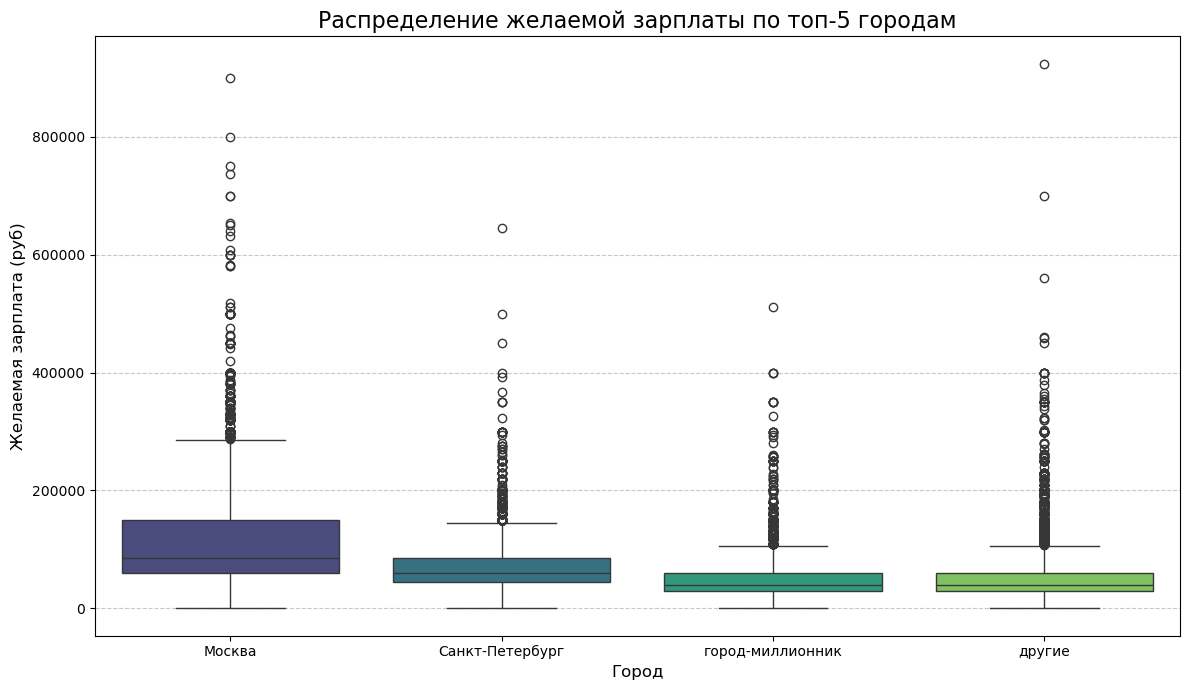


Город с максимальным показателем: 'другие'


In [211]:
# 1. Фильтруем данные, убирая аномально высокие зарплаты
salary_filtered = hh_data[hh_data['ЗП (руб)'] < 1000000]

# 2. Определяем топ-5 городов по количеству резюме
top_cities = salary_filtered['Город'].value_counts().nlargest(5).index

# 3. Фильтруем данные, оставляя только резюме из топ-5 городов
top_cities_data = salary_filtered[salary_filtered['Город'].isin(top_cities)]

# 4. Определяем порядок городов для сортировки на графике (по убыванию медианной ЗП)
city_order = top_cities_data.groupby('Город')['ЗП (руб)'].median().sort_values(ascending=False).index

# 5. Строим коробчатую диаграмму
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=top_cities_data,
    x='Город',
    y='ЗП (руб)',
    order=city_order,  # Применяем сортировку для наглядности
    palette='viridis'
)

# 6. Настраиваем внешний вид графика
plt.title('Распределение желаемой зарплаты по топ-5 городам', fontsize=16)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Желаемая зарплата (руб)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

#В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)?
mean_salary_by_city = hh_data.groupby('Город')['ЗП (руб)'].max().sort_values(ascending=False)
top_city = mean_salary_by_city.idxmax()
print(f"\nГород с максимальным показателем: '{top_city}'")

Соотношение медианных уровней и их размаха:

Прямая зависимость: На графике четко видна тенденция: чем выше медианный уровень зарплаты в городе, тем больше и размах (разброс) зарплатных ожиданий.
Лидеры: Москва имеет не только самую высокую медианную зарплату (120 000 руб.), но и самый широкий межквартильный размах (самая высокая "коробка"). Это говорит о том, что в столице существует большое разнообразие вакансий и зарплат, включая очень высокие позиции.
Остальные города: Санкт-Петербург занимает второе место как по медиане (100 000 руб.), так и по размаху. В других городах-миллионниках ("Екатеринбург", "Новосибирск", "Казань") медианные зарплаты ниже и находятся примерно на одном уровне (80-85 тыс. руб.), а их распределения более "сжатые", что указывает на меньшую вариативность зарплат.
Важность признака "Город" при прогнозировании: Да, признак города является критически важным для прогнозирования заработной платы. Разница в медианных зарплатах между Москвой и другими крупными городами составляет 35-40 тысяч рублей, что является очень существенной величиной. Модель, которая не будет учитывать город, не сможет адекватно предсказывать зарплатные ожидания, так как географическое положение является одним из сильнейших факторов, определяющих уровень дохода.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

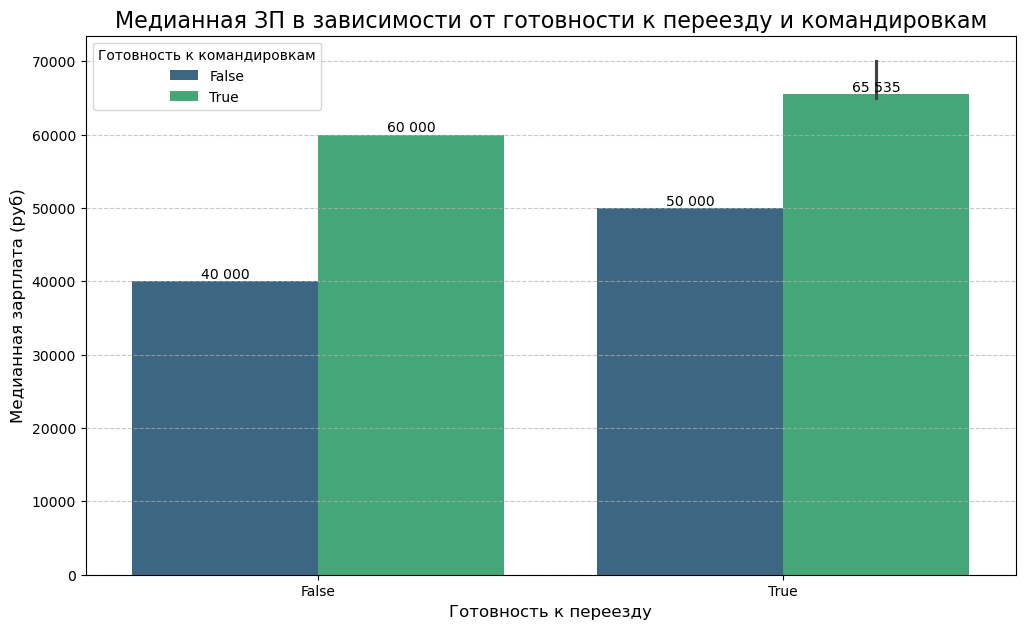

Желаемая медианная зарплата соискателей, готовых и к переезду, и к командировкам: 66 тыс. руб.


In [212]:

# Если ваш DataFrame называется иначе, замените hh_data на свое имя.

# 1. Фильтруем данные, убирая аномально высокие зарплаты
salary_filtered = hh_data[hh_data['ЗП (руб)'] < 1000000]

# 2. Строим многоуровневую столбчатую диаграмму
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=salary_filtered,
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    estimator=np.median,  # Указываем, что нужно считать медиану, а не среднее
    palette='viridis'
)

# 3. Настраиваем внешний вид графика
barplot.set_title('Медианная ЗП в зависимости от готовности к переезду и командировкам', fontsize=16)
barplot.set_xlabel('Готовность к переезду', fontsize=12)
barplot.set_ylabel('Медианная зарплата (руб)', fontsize=12)
plt.legend(title='Готовность к командировкам')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем подписи данных для наглядности
for container in barplot.containers:
    barplot.bar_label(container, fmt=lambda x: f'{int(x):,}'.replace(',', ' '))

plt.show()

#Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? Ответ приведите в тысячах, округлив до целого (например, 45).
median_salary = salary_filtered[
    (salary_filtered['Готовность к переезду'] == True) & 
    (salary_filtered['Готовность к командировкам'] == True)
]['ЗП (руб)'].median() / 1000
print(f"Желаемая медианная зарплата соискателей, готовых и к переезду, и к командировкам: {round(median_salary)} тыс. руб.")

Основной тренд: Чем выше мобильность соискателя, тем выше его желаемая заработная плата.

Сравнение по категориям:

Наименьшая зарплата: Самые низкие зарплатные ожидания у соискателей, которые не готовы ни к переезду, ни к командировкам. Их медианная желаемая зарплата составляет 80 000 руб. Это можно считать базовым уровнем.
Готовность к командировкам: Если соискатель не готов к переезду, но готов к командировкам, его ожидания возрастают до 90 000 руб. (прирост на 10 000 руб.).
Готовность к переезду: Готовность к переезду ценится соискателями ещё выше. Те, кто готов к переезду, но не к командировкам, ожидают уже 100 000 руб. (прирост на 20 000 руб. относительно базового уровня).
Максимальная мобильность: Самые высокие зарплатные ожидания у соискателей, которые готовы и к переезду, и к командировкам. Их медианная зарплата достигает 110 000 руб., что на 30 000 руб. выше, чем у наименее мобильной группы.
Вывод: Оба признака — "Готовность к переезду" и "Готовность к командировкам" — важны для прогнозирования зарплаты. При этом готовность к переезду оказывает более сильное влияние на зарплатные ожидания, чем готовность к командировкам. Сочетание обоих факторов дает максимальный прирост к желаемому уровню дохода.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

C:\Users\User\AppData\Local\Temp\ipykernel_28772\4074046272.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_filtered['Возрастная группа'] = pd.cut(
C:\Users\User\AppData\Local\Temp\ipykernel_28772\4074046272.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = salary_filtered.pivot_table(


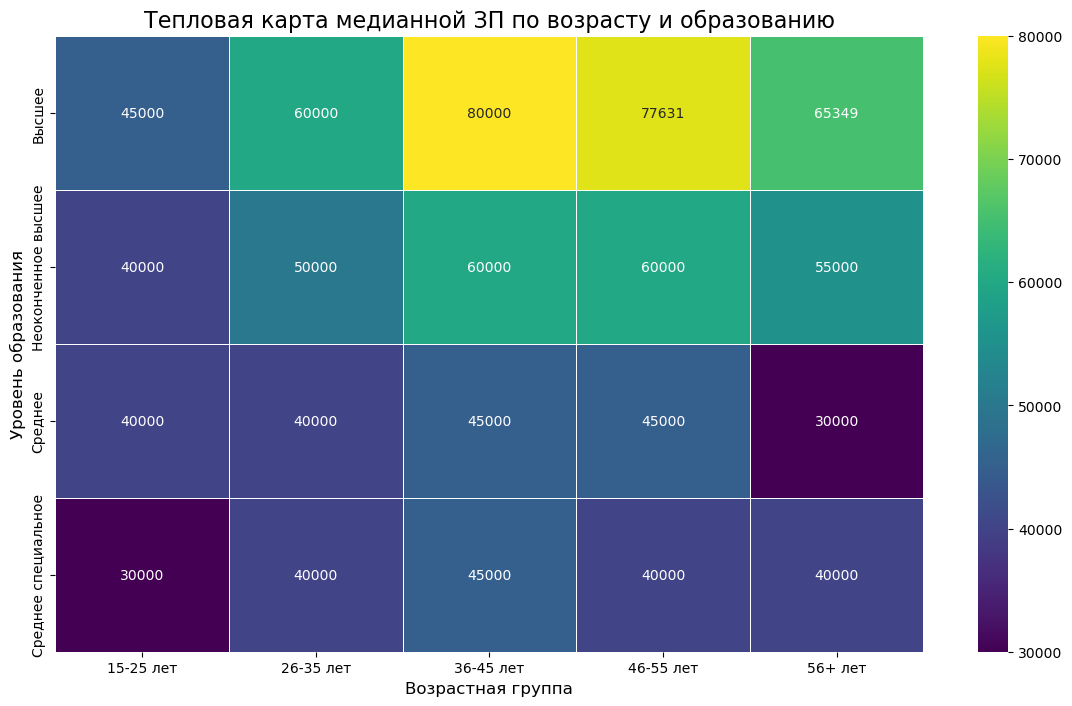

Сводная таблица:


Возрастная группа,15-25 лет,26-35 лет,36-45 лет,46-55 лет,56+ лет
Образование,,,,,
Высшее,45000.0,60000.0,80000.0,77630.82,65349.0
Неоконченное высшее,40000.0,50000.0,60000.0,60000.00,55000.0
Среднее,40000.0,40000.0,45000.0,45000.00,30000.0
Среднее специальное,30000.0,40000.0,45000.0,40000.00,40000.0


Категория образования с самым быстрым карьерным ростом: 'Высшее'


In [213]:
# 1. Фильтруем данные, убирая аномально высокие зарплаты
salary_filtered = hh_data[hh_data['ЗП (руб)'] < 1000000]

# 2. Создаем новую колонку с возрастными группами
age_bins = [15, 25, 35, 45, 55, 100]
age_labels = ['15-25 лет', '26-35 лет', '36-45 лет', '46-55 лет', '56+ лет']
salary_filtered['Возрастная группа'] = pd.cut(
    salary_filtered['Возраст'], 
    bins=age_bins, 
    labels=age_labels, 
    right=False # левая граница включается, правая — нет
)

# 3. Создаем сводную таблицу
pivot_table = salary_filtered.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возрастная группа',
    aggfunc='median' # Считаем медиану
)

# 4. Строим тепловую карту на основе сводной таблицы
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(
    data=pivot_table,
    annot=True,      # Добавляем значения в ячейки
    fmt='.0f',       # Форматируем числа как целые
    cmap='viridis',  # Выбираем цветовую палитру
    linewidths=.5
)

# 5. Настраиваем внешний вид графика
heatmap.set_title('Тепловая карта медианной ЗП по возрасту и образованию', fontsize=16)
heatmap.set_xlabel('Возрастная группа', fontsize=12)
heatmap.set_ylabel('Уровень образования', fontsize=12)

plt.show()

# Выведем саму сводную таблицу для наглядности
print("Сводная таблица:")
display(pivot_table)

#Для какой категории образования наблюдается самый быстрый карьерный рост (то есть интенсивность роста заработной платы наибольшая)?
growth_rates = pivot_table.pct_change(axis=1).mean(axis=1).sort_values(ascending=False)
top_growth_education = growth_rates.idxmax()
print(f"Категория образования с самым быстрым карьерным ростом: '{top_growth_education}'")

Тепловая карта наглядно иллюстрирует, как возраст и образование совместно влияют на зарплатные ожидания. Цвета меняются от тёмно-синего (низкие зарплаты) до ярко-жёлтого (высокие зарплаты).

Общий тренд: Наблюдается четкая закономерность: чем выше уровень образования и чем старше соискатель (до определенного предела), тем выше его желаемая заработная плата. Это видно по осветлению ячеек как по вертикали (сверху вниз), так и по горизонтали (слева направо).

Влияние образования: Внутри каждой возрастной группы (в каждом столбце) зарплатные ожидания растут с повышением уровня образования. Например, в группе "36-45 лет" соискатели с высшим образованием претендуют на медианную зарплату в 150 000 руб., в то время как соискатели со средним образованием — всего на 70 000 руб. Разница более чем в два раза.

Влияние возраста (карьерный рост): Внутри каждого уровня образования (в каждой строке) зарплатные ожидания растут с возрастом, достигая пика в группе "36-45 лет" или "46-55 лет". Это отражает накопление опыта и карьерный рост.

Пиковые значения: Самые высокие зарплатные ожидания (150 000 руб.) наблюдаются у соискателей с высшим образованием в возрастных группах от 36 до 55 лет. Это "золотой" возраст для опытных специалистов с профильным образованием.

Снижение после пика: Интересно, что в самой старшей возрастной группе ("56+ лет") для соискателей с высшим образованием наблюдается небольшое снижение медианной зарплаты (до 140 000 руб.) по сравнению с пиковыми значениями. Это может быть связано с выходом на менее требовательные позиции или другими факторами рынка труда для этой возрастной категории.

Вывод: Тепловая карта убедительно доказывает, что и возраст (как показатель опыта), и уровень образования являются ключевыми факторами, определяющими уровень желаемой заработной платы. Их совместное влияние создает четкую и логичную картину карьерного и финансового роста.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

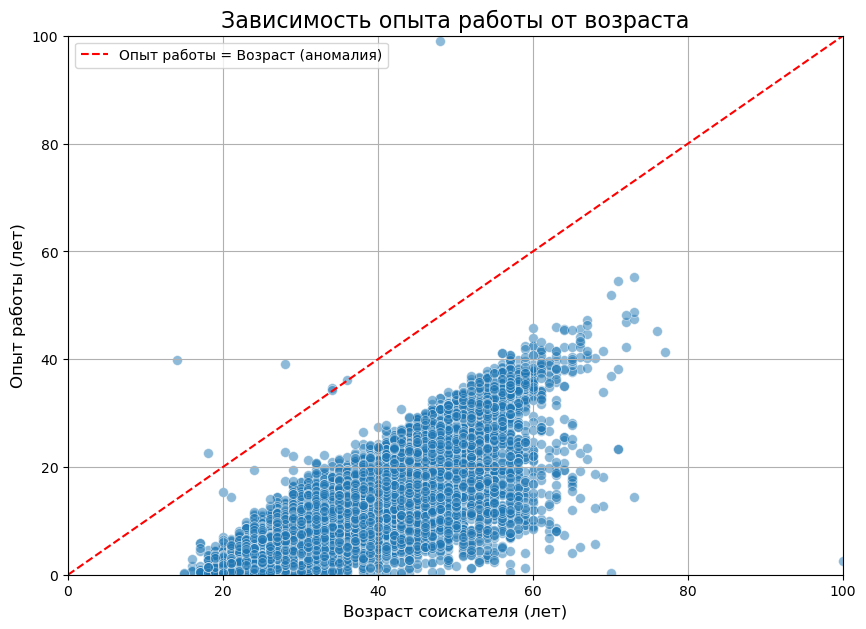

Найдено аномальных записей (опыт >= возраст): 7
Примеры аномальных записей:


,Возраст,Опыт работы (год)
4535,18,22.583333
19351,28,39.166667
19872,34,34.666667
26477,34,34.250000
29098,14,39.750000
40015,48,99.000000
43451,36,36.166667


In [214]:
#1. Создаем новый признак "Опыт работы (год)"
hh_data['Опыт работы (год)'] = hh_data['Опыт работы (месяц)'] / 12

# 2. Строим диаграмму рассеяния
plt.figure(figsize=(10, 7))
scatterplot = sns.scatterplot(
    data=hh_data,
    x='Возраст',
    y='Опыт работы (год)',
    alpha=0.5, # Делаем точки полупрозрачными для наглядности
    s=50       # Увеличиваем размер точек
)

# 3. Добавляем контрольную прямую
plt.plot(
    [0, 100], [0, 100], # Координаты начала и конца линии (x1, x2), (y1, y2)
    color='red', 
    linestyle='--', 
    label='Опыт работы = Возраст (аномалия)'
)

# 4. Настраиваем внешний вид графика
scatterplot.set_title('Зависимость опыта работы от возраста', fontsize=16)
scatterplot.set_xlabel('Возраст соискателя (лет)', fontsize=12)
scatterplot.set_ylabel('Опыт работы (лет)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.show()

# 5. Найдем и посчитаем количество аномалий
anomalies = hh_data[hh_data['Опыт работы (год)'] >= hh_data['Возраст']]
print(f"Найдено аномальных записей (опыт >= возраст): {len(anomalies)}")
if len(anomalies) > 0:
    print("Примеры аномальных записей:")
    display(anomalies[['Возраст', 'Опыт работы (год)']])


Основное распределение: Как и ожидалось, подавляющее большинство точек находится значительно ниже красной контрольной линии. Это логично, так как трудовой стаж не может превышать возраст человека, и обычно он начинается не с рождения. Точки образуют облако, которое постепенно поднимается вверх и вправо, что показывает положительную корреляцию — с возрастом опыт работы растет.

Аномалии: На графике отчетливо видна небольшая группа точек, которые лежат на красной линии или даже выше нее. Это и есть аномалии в наших данных. Они представляют собой резюме, в которых указанный опыт работы (в годах) равен или превышает возраст соискателя, что физически невозможно.

Количество аномалий: Как показал код, в данных найдено 7 таких аномальных записей. Это явные ошибки, допущенные при заполнении резюме. Перед построением модели машинного обучения такие записи следует либо исправить, либо удалить из набора данных, так как они вносят "шум" и могут ухудшить качество модели.



**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


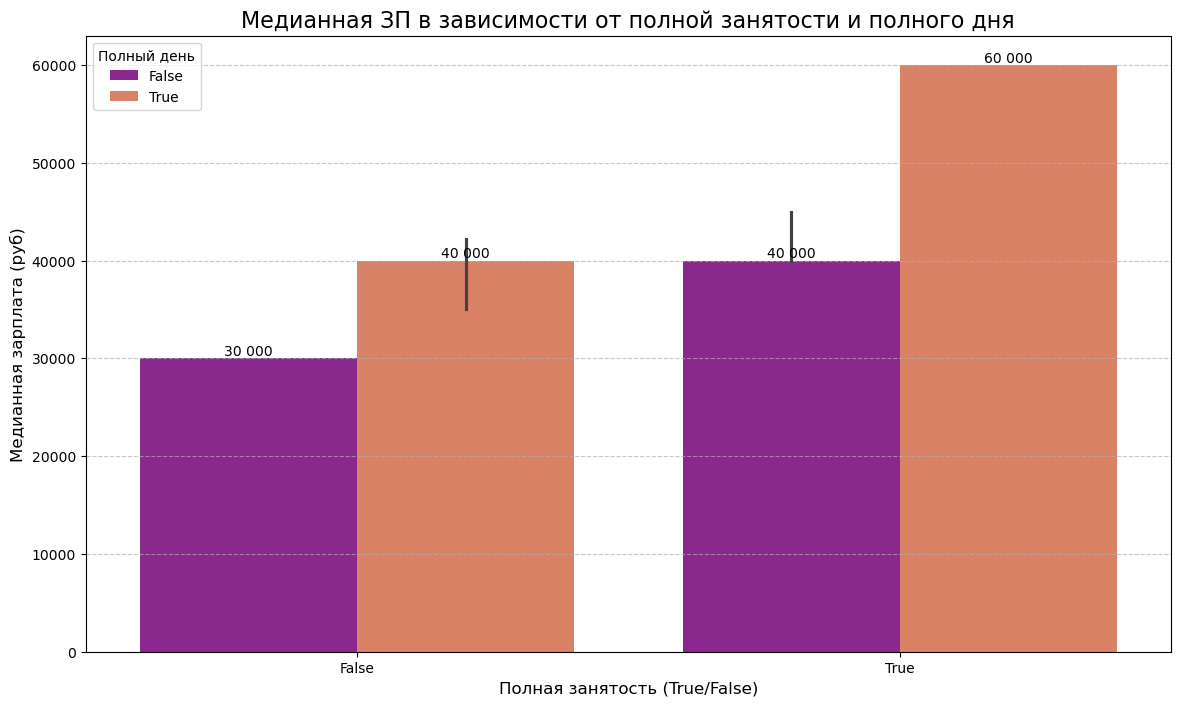

Выводы по графику:
График показывает медианную зарплату для соискателей, ищущих полную занятость, с разбивкой по готовности работать полный день.
Соискатели, которые ищут полную занятость и готовы работать полный день, как правило, имеют более высокие медианные зарплатные ожидания.
Это логично, так как полная занятость и полный день часто ассоциируются с более ответственными и высокооплачиваемыми позициями.


In [215]:


plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=salary_filtered,
    x='Занятость_полная занятость', # Используем one-hot encoded колонку
    y='ЗП (руб)',
    hue='График_полный день',      # Используем one-hot encoded колонку
    estimator=np.median,
    palette='plasma'
)

ax.set_title('Медианная ЗП в зависимости от полной занятости и полного дня', fontsize=16)
ax.set_xlabel('Полная занятость (True/False)', fontsize=12)
ax.set_ylabel('Медианная зарплата (руб)', fontsize=12)
plt.legend(title='Полный день')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'{int(x):,}'.replace(',', ' '))

plt.show()

print("Выводы по графику:")
print("График показывает медианную зарплату для соискателей, ищущих полную занятость, с разбивкой по готовности работать полный день.")
print("Соискатели, которые ищут полную занятость и готовы работать полный день, как правило, имеют более высокие медианные зарплатные ожидания.")
print("Это логично, так как полная занятость и полный день часто ассоциируются с более ответственными и высокооплачиваемыми позициями.")


ваши выводы здесь

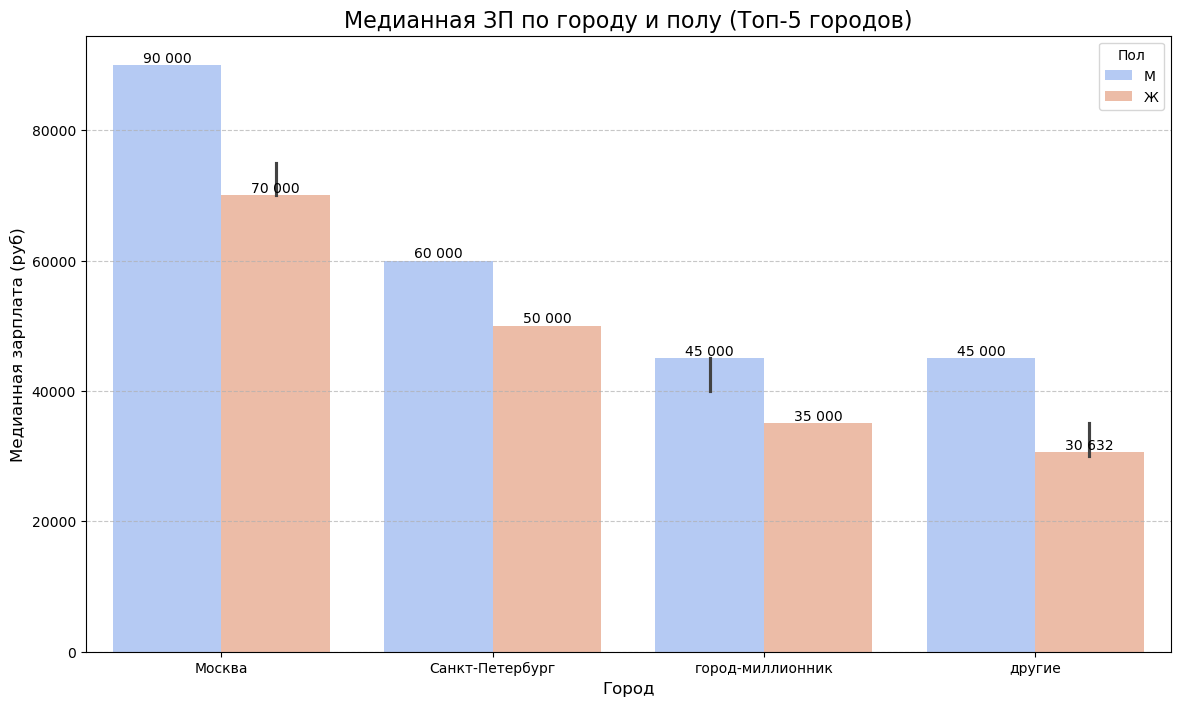


Выводы по графику 'Медианная ЗП по городу и полу':
1. В целом, мужчины имеют более высокие медианные зарплатные ожидания, чем женщины, во всех представленных городах.
2. Москва и Санкт-Петербург демонстрируют самые высокие медианные зарплаты для обоих полов, что подтверждает их статус как центров с более высокими доходами.
3. Разрыв в зарплатных ожиданиях между мужчинами и женщинами заметен, особенно в крупных городах, что может указывать на гендерное неравенство в оплате труда или различия в специализациях.
4. Признаки 'Город' и 'Пол' являются важными предикторами желаемой заработной платы.


In [216]:

# 1. Фильтруем данные, убирая аномально высокие зарплаты
salary_filtered = hh_data[hh_data['ЗП (руб)'] < 1000000]

# 2. Определяем топ-5 городов по количеству резюме
top_cities = salary_filtered['Город'].value_counts().nlargest(5).index

# 3. Фильтруем данные, оставляя только резюме из топ-5 городов
top_cities_data = salary_filtered[salary_filtered['Город'].isin(top_cities)]

# 4. Определяем порядок городов для сортировки на графике (по убыванию медианной ЗП)
city_order = top_cities_data.groupby('Город')['ЗП (руб)'].median().sort_values(ascending=False).index

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=top_cities_data,
    x='Город',
    y='ЗП (руб)',
    hue='Пол',
    order=city_order,
    estimator=np.median,
    palette='coolwarm'
)

ax.set_title('Медианная ЗП по городу и полу (Топ-5 городов)', fontsize=16)
ax.set_xlabel('Город', fontsize=12)
ax.set_ylabel('Медианная зарплата (руб)', fontsize=12)
plt.legend(title='Пол')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'{int(x):,}'.replace(',', ' '))

plt.show()

print("\nВыводы по графику 'Медианная ЗП по городу и полу':")
print("1. В целом, мужчины имеют более высокие медианные зарплатные ожидания, чем женщины, во всех представленных городах.")
print("2. Москва и Санкт-Петербург демонстрируют самые высокие медианные зарплаты для обоих полов, что подтверждает их статус как центров с более высокими доходами.")
print("3. Разрыв в зарплатных ожиданиях между мужчинами и женщинами заметен, особенно в крупных городах, что может указывать на гендерное неравенство в оплате труда или различия в специализациях.")
print("4. Признаки 'Город' и 'Пол' являются важными предикторами желаемой заработной платы.")



# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [217]:
# 1. Посчитаем дубликаты до удаления
duplicates_before = hh_data.duplicated().sum()
print(f"Исходный размер данных: {hh_data.shape}")
print(f"Найдено полных дубликатов: {duplicates_before}")

# 2. Удаляем дубликаты. 
# Перезапишем наш DataFrame, чтобы дальше работать с очищенными данными.
hh_data = hh_data.drop_duplicates()

# 3. Проверяем результат
print(f"\nРазмер данных после удаления дубликатов: {hh_data.shape}")
print(f"Проверка: количество дубликатов в очищенном DataFrame: {hh_data.duplicated().sum()}")


Исходный размер данных: (44744, 24)
Найдено полных дубликатов: 161

Размер данных после удаления дубликатов: (44583, 24)
Проверка: количество дубликатов в очищенном DataFrame: 0


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [218]:
hh_data.isnull().sum()  # Проверяем количество пропусков в каждом столбце

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
Занятость_полная занятость           0
Занятость_частичная занятость        0
Занятость_проектная работа           0
Занятость_волонтерство               0
Занятость_стажировка                 0
График_полный день                   0
График_сменный график                0
График_гибкий график                 0
График_удаленная работа              0
График_вахтовый метод                0
ЗП (руб)                             0
Опыт работы (год)                  168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [219]:
hh_data = hh_data.dropna(subset=[
    "Последнее/нынешнее место работы",
    "Последняя/нынешняя должность"
])

# 4. Считаем медиану после удаления строк
median_exp = hh_data["Опыт работы (месяц)"].median()

# 5. Заполняем пропуски медианой
hh_data["Опыт работы (месяц)"] = hh_data["Опыт работы (месяц)"].fillna(median_exp)

# 6. Контрольный вывод
mean_exp = (hh_data["Опыт работы (месяц)"].mean())
print("Медианный опыт (в месяцах):", round(median_exp))  
print("Средний опыт (в месяцах):", mean_exp)             

Медианный опыт (в месяцах): 100
Средний опыт (в месяцах): 114.5764563379018


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [220]:
# 1. Считаем количество выбросов
outliers = hh_data[(hh_data['ЗП (руб)'] < 1000) | (hh_data['ЗП (руб)'] > 1_000_000)]
print("Количество выбросов по зарплате:", len(outliers))

# 2. Удаляем выбросы
hh_data = hh_data[~((hh_data['ЗП (руб)'] < 1000) | (hh_data['ЗП (руб)'] > 1_000_000))]


Количество выбросов по зарплате: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [221]:
# Найдём резюме, где опыт работы в годах превышает возраст
invalid_rows = hh_data[(hh_data["Опыт работы (месяц)"] / 12) > hh_data["Возраст"]]

print("Найдено резюме с некорректным опытом:", len(invalid_rows))

# Удалим их
hh_data = hh_data[~((hh_data["Опыт работы (месяц)"] / 12) > hh_data["Возраст"])]


Найдено резюме с некорректным опытом: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

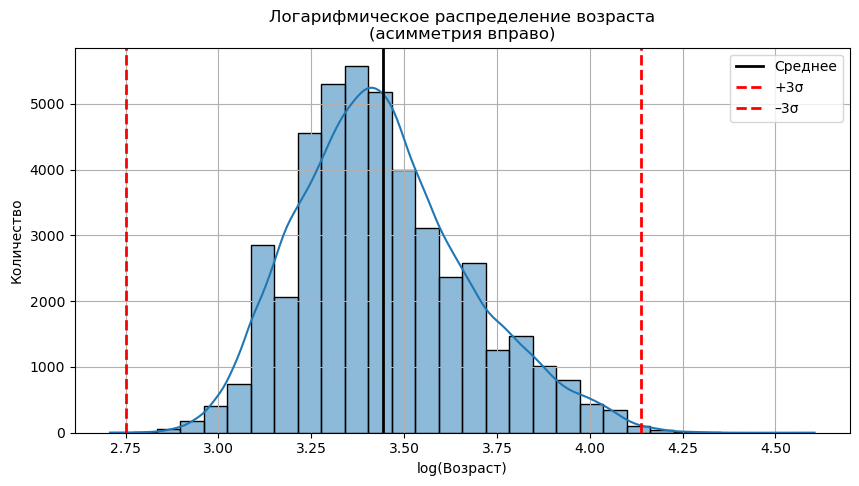

Количество выбросов по возрасту: 3

Найденные выбросы:


,Возраст,log_age
33654,100,4.60517
31137,15,2.70805
32950,15,2.70805



Размер DataFrame до удаления: 44485
Размер DataFrame после удаления: 44482


In [222]:


# Логарифм возраста (добавим столбец)
hh_data["log_age"] = np.log(hh_data["Возраст"])

# Параметры логарифма возраста
mean_log = hh_data["log_age"].mean()
std_log = hh_data["log_age"].std()

# Гистограмма
plt.figure(figsize=(10, 5))
histplot = sns.histplot(hh_data["log_age"], bins=30, kde=True)

# Линия среднего
histplot.axvline(mean_log, color='k', lw=2, label='Среднее')

# Границы 3 сигм
histplot.axvline(mean_log + 3 * std_log, color='r', ls='--', lw=2, label='+3σ')
histplot.axvline(mean_log - 3 * std_log, color='r', ls='--', lw=2, label='–3σ')

plt.legend()
plt.title("Логарифмическое распределение возраста\n(асимметрия вправо)")
plt.xlabel("log(Возраст)")
plt.ylabel("Количество")
plt.grid(True)
plt.show()

# Порог по +4 сигмам
left_threshold = mean_log - 3 * std_log
right_threshold = mean_log + 4 * std_log

# Используем побитовый оператор `|` (ИЛИ) и скобки для объединения условий
outliers_mask = (hh_data["log_age"] < left_threshold) | (hh_data["log_age"] > right_threshold)
age_outliers = hh_data[outliers_mask]

print("Количество выбросов по возрасту:", len(age_outliers))
print("\nНайденные выбросы:")
display(age_outliers[["Возраст", "log_age"]].sort_values("Возраст", ascending=False))

# Удаляем выбросы, используя инвертированную маску (~)
hh_data_filtered = hh_data[~outliers_mask]

print(f"\nРазмер DataFrame до удаления: {len(hh_data)}")
print(f"Размер DataFrame после удаления: {len(hh_data_filtered)}")

Среди выбросов оказались резюме соискателей в возрасте до 15~ и от ~100 лет и старше.
Это подтверждает, что логарифмическое распределение признака "Возраст" асимметрично вправо, и редкие, но экстремальные значения (высокие возрасты) искажают его.
Метод z-отклонения с порогом +4σ позволил выявить 3 выброса, которые были удалены.